In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6144)])
  except RuntimeError as e:
    print(e)

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/svabh/Documents/Python Scripts/TimeSeries/data.csv')

In [3]:
df.head()

,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A120,A121,A122,A123,A124,A125,A126,A127,A128,A129
0,8/7/20 23:00,42322.50954,NaN,42194.42674,42084.15074,39487.62661,38682.15024,39200.19006,39678.53160,42863.62232,...,0.0046,0.011985,0.002575,0.019876,0.019557,0.001682,0.000269,0.000183,0.000063,0.000029
1,8/8/20 0:00,38321.75613,NaN,37975.72793,38120.99648,34683.41540,33742.42565,34399.58116,35093.09455,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/8/20 1:00,31800.76235,NaN,31790.90956,31640.63336,28307.88893,27690.12442,28229.83785,28524.22982,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/8/20 2:00,24821.93256,NaN,24826.29762,24655.61241,21913.65545,21180.89325,21800.79384,21600.73989,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/8/20 3:00,18875.11406,NaN,19013.66528,18741.47863,16817.26337,16235.85597,16377.17201,16549.33023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
type(df['Time'][0])

str

In [5]:
df['Time'] = pd.to_datetime(df['Time'])

In [6]:
df = df.set_index('Time')

<AxesSubplot:xlabel='Time'>

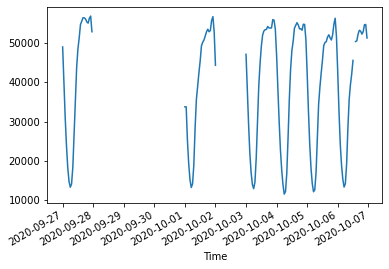

In [7]:
df['A2'][1200:1696].plot()

<AxesSubplot:>

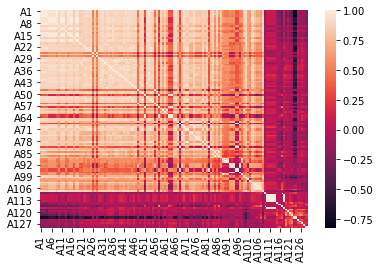

In [8]:
corr = df.corr()
sns.heatmap(corr)

In [9]:
for i in df:
    print(df[i].isna().sum())

291
423
366
405
274
271
282
308
590
411
347
365
434
638
509
509
278
520
522
317
354
283
100
282
114
267
276
284
310
146
93
423
114
65
60
80
291
284
78
69
99
298
113
440
304
95
312
323
467
343
268
508
334
376
193
320
519
388
423
578
300
635
280
349
75
100
278
311
320
395
62
50
286
291
428
278
304
289
116
349
150
445
347
91
474
69
424
404
287
342
364
60
258
118
298
297
297
463
564
506
623
466
385
582
582
572
433
382
917
643
649
654
800
811
829
711
1455
889
657
670
668
837
656
876
700
658
702
661
657


In [10]:
df = df.assign(InterpolateLinear=df.A125.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.A125.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.A125.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.A125.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.A125.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.A125.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.A125.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.A125.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.A125.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.A125.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.A125.interpolate(method='spline', order=5))

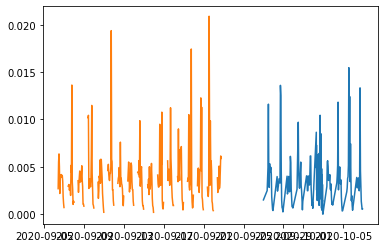

In [11]:
plt.plot(df['InterpolateTime'][1200:])

plt.plot(df['A125'][700:1100])
plt.rcParams["figure.figsize"] = (24,8)
plt.show()

In [12]:
df.isna().sum()[df.isna().sum()>0]

A1      291
A2      423
A3      366
A4      405
A5      274
       ... 
A125    700
A126    658
A127    702
A128    661
A129    657
Length: 129, dtype: int64

In [13]:
df.drop(['A2','A101', 'A117'], axis = 1, inplace = True)

# Prepare Data

In [14]:
feature = 'A1' #A1 - A127 not including A2, A101, or A117 because not enough values to accurately interpolate
test_ind = '2020-10-03 23:00:00'
method = 'time'

<AxesSubplot:xlabel='Time'>

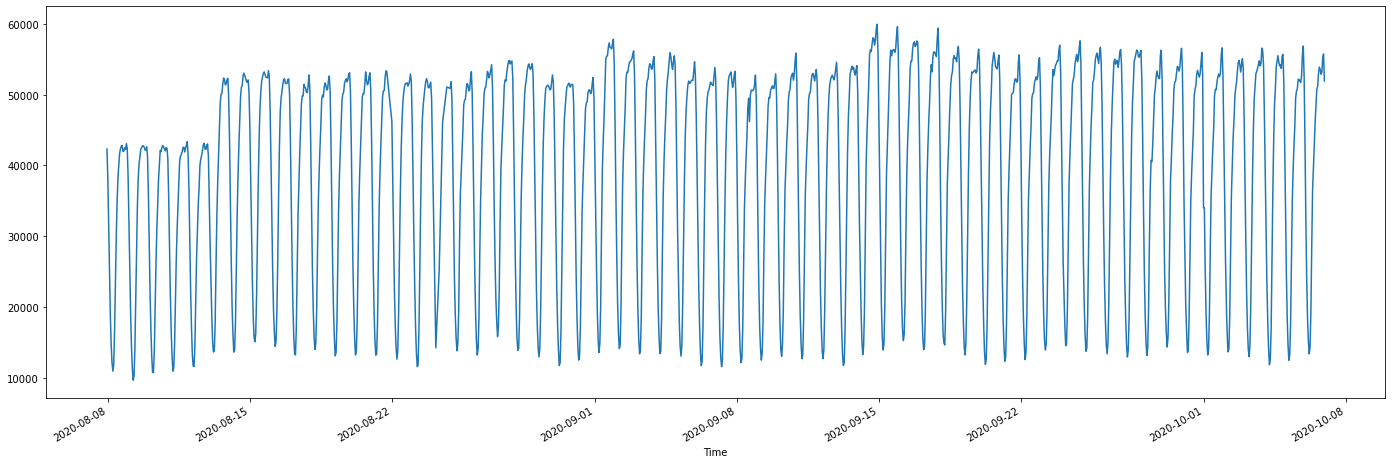

In [15]:
df[feature].interpolate(method = method).plot()

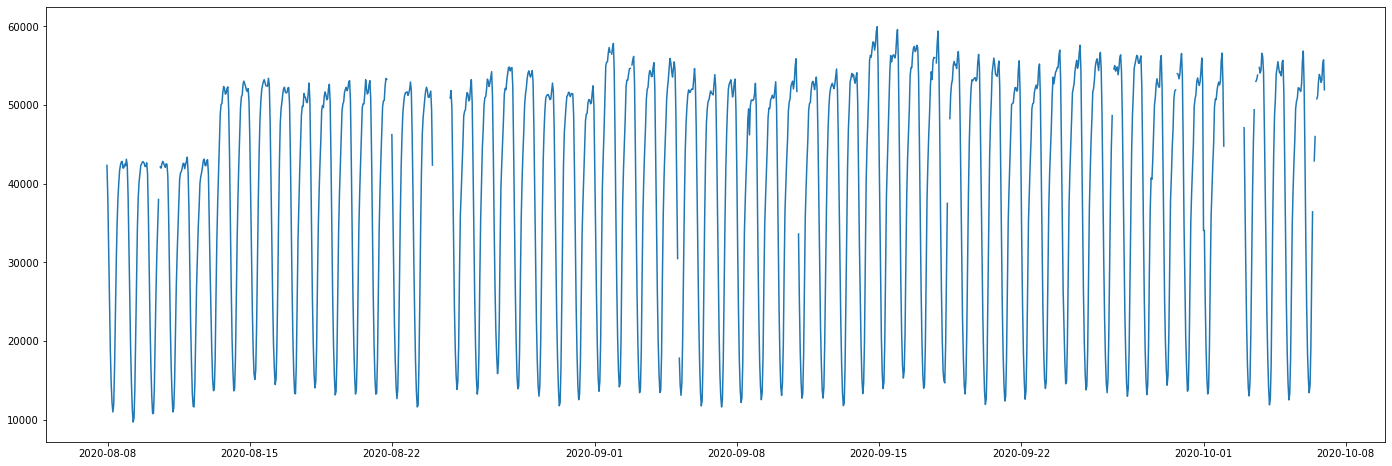

In [16]:
plt.plot(df[feature])

In [17]:


train = df[feature].interpolate(method = method).loc[:test_ind]
test = df[feature].interpolate(method = method).loc[test_ind:]
test_size = len(test)

In [18]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [20]:
train.shape

(1624, 1)

# Scale Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
length = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [27]:
X, y = generator[0]

In [28]:
X

array([[[0.64921176],
        [0.56961012],
        [0.43986409],
        [0.30100866],
        [0.18268681],
        [0.0993491 ],
        [0.04928936],
        [0.02534054],
        [0.04437059],
        [0.13662786],
        [0.26763272],
        [0.40230623],
        [0.5003799 ],
        [0.56474027],
        [0.60533546],
        [0.63667807],
        [0.65047987],
        [0.65759301],
        [0.65927611],
        [0.64216654],
        [0.64332614],
        [0.6522899 ],
        [0.64800622],
        [0.66464183]]])

# LSTM Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(length, 1), return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(70, activation = 'relu', input_shape=(length, 1), return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(50, activation = 'relu', input_shape=(length, 1)))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 24, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 70)            47880     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 70)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                24200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [34]:
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1600 steps, validate for 49 steps
Epoch 1/20
1600/1600 [==============================] - 99s 62ms/step - loss: 0.0572 - val_loss: 0.0073
Epoch 2/20
1600/1600 [==============================] - 96s 60ms/step - loss: 0.0200 - val_loss: 0.0364
Epoch 3/20
1600/1600 [==============================] - 97s 61ms/step - loss: 0.0168 - val_loss: 0.0067
Epoch 4/20
1600/1600 [==============================] - 98s 61ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 5/20
1600/1600 [==============================] - 96s 60ms/step - loss: 0.0099 - val_loss: 0.0019
Epoch 6/20
1600/1600 [==============================] - 97s 61ms/step - loss: 0.0092 - val_loss: 0.0028
Epoch 7/20
1600/1600 [==============================] - 98s 61ms/step - loss: 0.0072 - val_loss: 0.0031


<AxesSubplot:>

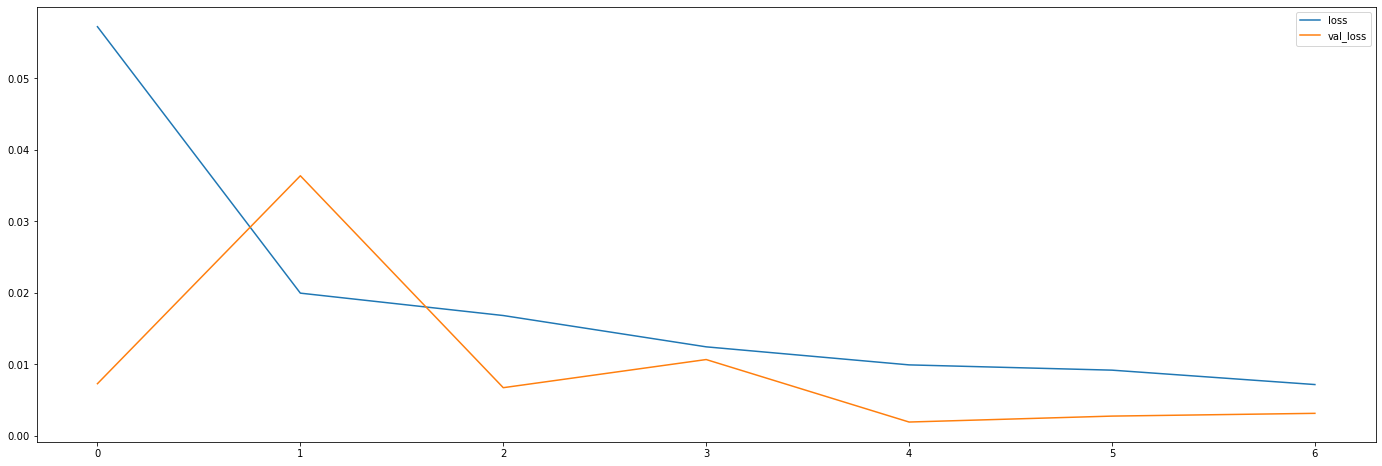

In [35]:
pd.DataFrame(model.history.history).plot()

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [37]:
test_predictions

[array([0.7344198], dtype=float32),
 array([0.5810217], dtype=float32),
 array([0.4183819], dtype=float32),
 array([0.27513245], dtype=float32),
 array([0.17966762], dtype=float32),
 array([0.11827199], dtype=float32),
 array([0.08300424], dtype=float32),
 array([0.13228992], dtype=float32),
 array([0.30598962], dtype=float32),
 array([0.4786081], dtype=float32),
 array([0.6119466], dtype=float32),
 array([0.68812513], dtype=float32),
 array([0.7317023], dtype=float32),
 array([0.7574072], dtype=float32),
 array([0.7726995], dtype=float32),
 array([0.78293085], dtype=float32),
 array([0.7928604], dtype=float32),
 array([0.80095625], dtype=float32),
 array([0.80656105], dtype=float32),
 array([0.81387085], dtype=float32),
 array([0.82326233], dtype=float32),
 array([0.8276119], dtype=float32),
 array([0.81821275], dtype=float32),
 array([0.7889292], dtype=float32),
 array([0.7326049], dtype=float32),
 array([0.6118101], dtype=float32),
 array([0.45602712], dtype=float32),
 array([0.3171

In [38]:
actual_predictions = scaler.inverse_transform(test_predictions)
test['Predicted'] = actual_predictions

In [39]:
test

,A1,Predicted
Time,,
2020-10-03 23:00:00,54173.46836,46605.039385
2020-10-04 00:00:00,47161.82361,38895.299995
2020-10-04 01:00:00,38856.50132,30721.074206
2020-10-04 02:00:00,30545.27219,23521.402448
2020-10-04 03:00:00,23210.41312,18723.370771
...,...,...
2020-10-06 19:00:00,52875.94299,47890.453794
2020-10-06 20:00:00,53171.38886,48305.901912
2020-10-06 21:00:00,55194.69185,48483.152107


<AxesSubplot:xlabel='Time'>

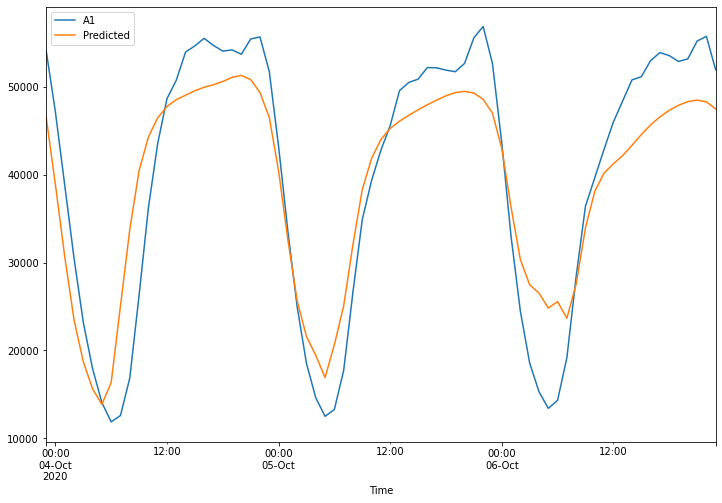

In [40]:
test.plot(figsize=(12,8))